In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd
from tqdm import tqdm
from shapely.geometry import Polygon, Point
from shapely.vectorized import contains  # use contains_xy se estiver com Shapely >= 2.0

def define_geo_points(polygon,num_required):
    minx, miny, maxx, maxy = polygon.bounds
    area_bbox = (maxx - minx) * (maxy - miny)
    area_polygon = polygon.area

    # Gerar pontos vetorialmente
    batch_size = int(num_required /(area_polygon/area_bbox))  # margem para garantir cobertura
    a = 2.326  # z para 99%
    batch_size = int((num_required + a /2 + a*(num_required + a/4)**0.5)/(area_polygon/area_bbox))  # margem para garantir cobertura
    x = np.random.uniform(minx, maxx, batch_size)
    y = np.random.uniform(miny, maxy, batch_size)
    
    # Filtrar vetorialmente os pontos dentro do polígono
    mask = contains(polygon, x, y)  # use contains_xy se estiver com Shapely >= 2.0
    valid_coords = np.column_stack((x[mask], y[mask]))

    # Selecionar os primeiros 55.000 pontos válidos
    selected_coords = valid_coords[:int(num_required)]
    
    if len(valid_coords) < num_required:
        print(batch_size, len(valid_coords))
        selected_coords = define_geo_points(polygon,num_required)
    
    return selected_coords

In [11]:
import pandas as pd
import zipfile
import geopandas as gpd

def open_shapefile(estado, path='', zip=False):
    if zip:
        shp = f"C:/Users/carlo/Downloads/{estado}_setores_CD2022/{estado}_setores_CD2022.shp"
        gdf = gpd.read_file(shp)
        return gdf
    # Caminho para o arquivo ZIP
    zip_path = f"C:/Users//Downloads/{estado}_setores_CD2022.zip"

    # Nome do shapefile dentro do ZIP (sem o caminho completo)
    shapefile_name = f"{estado}_setores_CD2022.shp"

    # Caminho completo usando o protocolo zip
    zip_shapefile_path = f"zip://{zip_path}!{shapefile_name}"

    # Lê diretamente o shapefile do ZIP
    gdf = gpd.read_file(zip_shapefile_path)
    return gdf

def open_csv(path, zip = False):
    if zip:
        csv = "C:/Users/carlo/Downloads/Agregados_por_setores_demografia_BR/Agregados_por_setores_demografia_BR.csv"
        df = pd.read_csv(csv, sep = ';')

        return df
    # Caminho para o arquivo ZIP
    zip_path = "C:/Users//Downloads/Agregados_por_setores_demografia_BR.zip"

    # Nome do CSV dentro do ZIP
    csv_filename = 'Agregados_por_setores_demografia_BR.csv'

    # Abre o ZIP e lê o CSV diretamente
    with zipfile.ZipFile(zip_path) as z:
        with z.open(csv_filename) as f:
            df = pd.read_csv(f, sep=';')
    
    return df


In [5]:
# Definir o polígono (exemplo)
polygon_coords = [(0, 0), (5, 1), (6, 4), (3, 6), (1, 5), (0, 3)]
polygon = Polygon(polygon_coords)

### Testar se o valor de ponntos extra é um bom valor
for a in range(1000):
    define_geo_points(polygon,1000)

In [12]:
STATE_NAME = "AP"
CITY_NAME = "Oiapoque"

gdf = open_shapefile(STATE_NAME, zip = True)
df = open_csv("", zip = True)
df['CD_setor'] = df['CD_setor'].astype('str')

C:\Users\carlo\AppData\Local\Temp\ipykernel_25432\2276004287.py:26: DtypeWarning: Columns (1,2,3,4,9,18,25,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv, sep = ';')


In [13]:
df = df[['CD_setor', 'V01006', 'V01009', 'V01010', 'V01011', 'V01012', 'V01013', 'V01014', 'V01015', 
   'V01016', 'V01017', 'V01018', 'V01019', 'V01020', 'V01021', 'V01022', 'V01023', 'V01024', 'V01025', 
   'V01026', 'V01027', 'V01028', 'V01029','V01030']]

df

,CD_setor,V01006,V01009,V01010,V01011,V01012,V01013,V01014,V01015,V01016,...,V01021,V01022,V01023,V01024,V01025,V01026,V01027,V01028,V01029,V01030
0,110001505000002,928,30,39,24,44,36,25,63,53,...,29,38,44,32,33,81,76,67,32,30
1,110001505000003,556,15,20,20,19,30,20,46,45,...,16,27,19,17,24,37,50,27,27,20
2,110001505000004,222,5,4,9,14,7,5,16,13,...,7,6,12,4,6,17,24,11,13,6
3,110001505000006,785,36,33,34,41,42,27,65,42,...,30,27,34,29,26,59,50,50,25,22
4,110001505000007,748,28,25,33,27,24,31,52,52,...,27,21,25,27,30,58,64,43,34,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458767,530010805440139,36,3,X,X,0,0,3,3,X,...,X,X,3,X,X,4,3,X,X,0
458768,530010805440140,633,18,18,31,18,27,29,36,43,...,23,20,20,39,30,53,53,32,33,20
458769,530010805440141,387,12,14,12,17,10,19,27,29,...,13,14,7,12,18,36,28,33,13,19
458770,530010805440142,348,9,12,13,20,17,11,24,28,...,7,20,24,14,10,31,38,21,9,0


In [14]:
gdf = gdf[gdf['NM_MUN']==CITY_NAME][['CD_SETOR','SITUACAO','NM_DIST','NM_SUBDIST','NM_BAIRRO','NM_MUN', 'geometry']].reset_index(drop=True)
gdf

,CD_SETOR,SITUACAO,NM_DIST,NM_SUBDIST,NM_BAIRRO,NM_MUN,geometry
0,160050105000001,Urbana,Oiapoque,None,None,Oiapoque,"POLYGON ((-51.83259 3.84679, -51.83315 3.84813..."
1,160050105000004,Urbana,Oiapoque,None,None,Oiapoque,"POLYGON ((-51.83491 3.84363, -51.83539 3.84338..."
2,160050105000007,Rural,Oiapoque,None,None,Oiapoque,"POLYGON ((-51.76159 3.97477, -51.76783 3.96367..."
3,160050105000008,Rural,Oiapoque,None,None,Oiapoque,"POLYGON ((-51.69066 3.96071, -51.69301 3.95662..."
4,160050105000009,Rural,Oiapoque,None,None,Oiapoque,"POLYGON ((-51.63154 4.0493, -51.63175 4.04934,..."
...,...,...,...,...,...,...,...
92,160050115000029,Rural,Vila Velha,None,None,Oiapoque,"POLYGON ((-51.34329 3.30718, -51.34315 3.30778..."
93,160050115000030,Rural,Vila Velha,None,None,Oiapoque,"POLYGON ((-51.53538 3.33891, -51.52628 3.34307..."
94,160050120000001,Rural,Vila Brasil,None,None,Oiapoque,"POLYGON ((-52.3231 3.17078, -52.32306 3.15922,..."
95,160050120000002,Rural,Vila Brasil,None,None,Oiapoque,"POLYGON ((-52.23693 3.23941, -52.23329 3.23565..."


<Axes: >

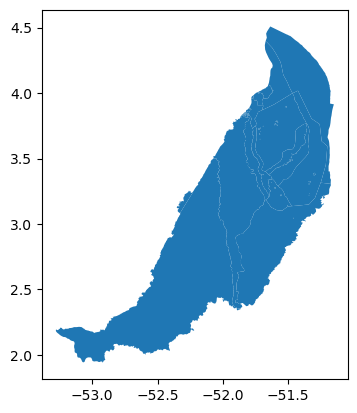

In [25]:
gdf.plot()

In [15]:
setores = gdf.merge(df, left_on='CD_SETOR', right_on='CD_setor', how='left')

lista = ['V01006', 'V01009', 'V01010', 'V01011', 'V01012', 'V01013', 'V01014', 'V01015', 
   'V01016', 'V01017', 'V01018', 'V01019', 'V01020', 'V01021', 'V01022', 'V01023', 'V01024', 'V01025', 
   'V01026', 'V01027', 'V01028', 'V01029','V01030']

setores = setores.replace('X',np.nan)
setores = setores.fillna(0)
setores[lista] = setores[lista].astype('int16') 
setores = setores[setores['V01006']>0].reset_index(drop=True)
setores['soma'] = setores[lista[1:]].sum(axis=1) 
#### Existe diferença entre o total e a soma pelos recortes de idade e sexo. ### Pelo menos no Rio de Janeiro.
setores

C:\Users\carlo\AppData\Local\Temp\ipykernel_25432\716924784.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  setores = setores.fillna(0)


,CD_SETOR,SITUACAO,NM_DIST,NM_SUBDIST,NM_BAIRRO,NM_MUN,geometry,CD_setor,V01006,V01009,...,V01022,V01023,V01024,V01025,V01026,V01027,V01028,V01029,V01030,soma
0,160050105000001,Urbana,Oiapoque,0,0,Oiapoque,"POLYGON ((-51.83259 3.84679, -51.83315 3.84813...",160050105000001,702,32,...,36,31,23,33,55,41,46,11,12,702
1,160050105000004,Urbana,Oiapoque,0,0,Oiapoque,"POLYGON ((-51.83491 3.84363, -51.83539 3.84338...",160050105000004,812,34,...,24,29,44,37,51,61,40,32,11,812
2,160050105000007,Rural,Oiapoque,0,0,Oiapoque,"POLYGON ((-51.76159 3.97477, -51.76783 3.96367...",160050105000007,25,0,...,0,0,0,0,0,0,0,0,0,4
3,160050105000008,Rural,Oiapoque,0,0,Oiapoque,"POLYGON ((-51.69066 3.96071, -51.69301 3.95662...",160050105000008,18,0,...,0,0,0,0,0,0,0,0,0,9
4,160050105000011,Rural,Oiapoque,0,0,Oiapoque,"POLYGON ((-51.7826 3.57195, -51.78257 3.57295,...",160050105000011,42,0,...,0,3,0,0,3,0,0,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,160050115000027,Rural,Vila Velha,0,0,Oiapoque,"POLYGON ((-51.32989 3.32634, -51.32612 3.32124...",160050115000027,21,3,...,0,0,0,0,0,0,0,0,0,10
76,160050115000029,Rural,Vila Velha,0,0,Oiapoque,"POLYGON ((-51.34329 3.30718, -51.34315 3.30778...",160050115000029,23,3,...,0,0,0,0,0,0,0,0,0,6
77,160050120000001,Rural,Vila Brasil,0,0,Oiapoque,"POLYGON ((-52.3231 3.17078, -52.32306 3.15922,...",160050120000001,240,7,...,9,7,8,6,21,20,16,3,0,239
78,160050120000002,Rural,Vila Brasil,0,0,Oiapoque,"POLYGON ((-52.23693 3.23941, -52.23329 3.23565...",160050120000002,29,4,...,0,0,3,0,4,0,0,0,0,20


In [16]:
v = setores[lista[1]]
for a in lista[2:]:
    v= v + setores[a]
c=0
for a in v:
    c+=a
c

26733

In [17]:
setores[setores['V01006']!= setores['soma']]

,CD_SETOR,SITUACAO,NM_DIST,NM_SUBDIST,NM_BAIRRO,NM_MUN,geometry,CD_setor,V01006,V01009,...,V01022,V01023,V01024,V01025,V01026,V01027,V01028,V01029,V01030,soma
2,160050105000007,Rural,Oiapoque,0,0,Oiapoque,"POLYGON ((-51.76159 3.97477, -51.76783 3.96367...",160050105000007,25,0,...,0,0,0,0,0,0,0,0,0,4
3,160050105000008,Rural,Oiapoque,0,0,Oiapoque,"POLYGON ((-51.69066 3.96071, -51.69301 3.95662...",160050105000008,18,0,...,0,0,0,0,0,0,0,0,0,9
4,160050105000011,Rural,Oiapoque,0,0,Oiapoque,"POLYGON ((-51.7826 3.57195, -51.78257 3.57295,...",160050105000011,42,0,...,0,3,0,0,3,0,0,0,0,19
5,160050105000012,Rural,Oiapoque,0,0,Oiapoque,"POLYGON ((-51.7406 3.49808, -51.74302 3.50254,...",160050105000012,57,5,...,0,0,0,0,3,0,3,0,0,42
6,160050105000013,Rural,Oiapoque,0,0,Oiapoque,"POLYGON ((-51.72849 3.43217, -51.72846 3.43236...",160050105000013,84,11,...,0,4,7,5,0,5,0,0,0,78
7,160050105000014,Rural,Oiapoque,0,0,Oiapoque,"POLYGON ((-51.69214 3.37342, -51.69276 3.37342...",160050105000014,44,4,...,0,4,3,0,0,3,0,0,0,31
9,160050105000017,Rural,Oiapoque,0,0,Oiapoque,"POLYGON ((-51.59515 3.76514, -51.5951 3.76505,...",160050105000017,361,14,...,19,23,21,17,17,15,11,4,5,359
14,160050105000031,Rural,Oiapoque,0,0,Oiapoque,"POLYGON ((-51.37523 3.68284, -51.37542 3.68283...",160050105000031,56,3,...,0,0,7,0,4,3,0,0,0,43
15,160050105000032,Rural,Oiapoque,0,0,Oiapoque,"POLYGON ((-51.47242 3.53303, -51.47261 3.53302...",160050105000032,32,0,...,0,3,0,3,0,0,0,0,0,21
16,160050105000033,Rural,Oiapoque,0,0,Oiapoque,"POLYGON ((-51.47786 3.50714, -51.47806 3.50713...",160050105000033,52,3,...,0,6,5,0,0,0,0,0,0,37


In [18]:
lista_points = []
for a in tqdm(setores[['geometry','soma']].itertuples()):
    lista_points.append(define_geo_points(a.geometry,int(a.soma)))

# Transformar cada array de coordenadas em um GeoDataFrame de pontos
gdf_points = gpd.GeoDataFrame(
    geometry=[Point(xy) for arr in lista_points for xy in arr],
    crs="EPSG:4326"
)
gdf_points

80it [00:00, 924.64it/s]


,geometry
0,POINT (-51.82871 3.84932)
1,POINT (-51.83146 3.8483)
2,POINT (-51.83105 3.84798)
3,POINT (-51.82901 3.85037)
4,POINT (-51.82965 3.84933)
...,...
26728,POINT (-52.26044 3.25256)
26729,POINT (-52.26199 3.24567)
26730,POINT (-52.26064 3.25067)
26731,POINT (-52.26301 3.24644)


In [19]:
conta = 0
soma = 0
for a in setores['V01006']:
    conta += a
for a in setores['soma']:
    soma += a
conta, soma

(27312, 26733)

In [20]:
t = {'V01009': 'Sexo masculino, 0 a 4 anos',
 'V01010': 'Sexo masculino, 5 a 9 anos',
 'V01011': 'Sexo masculino, 10 a 14 anos',
 'V01012': 'Sexo masculino, 15 a 19 anos',
 'V01013': 'Sexo masculino, 20 a 24 anos',
 'V01014': 'Sexo masculino, 25 a 29 anos',
 'V01015': 'Sexo masculino, 30 a 39 anos',
 'V01016': 'Sexo masculino, 40 a 49 anos',
 'V01017': 'Sexo masculino, 50 a 59 anos',
 'V01018': 'Sexo masculino, 60 a 69 anos',
 'V01019': 'Sexo masculino, 70 anos ou mais',
 'V01020': 'Sexo feminino, 0 a 4 anos',
 'V01021': 'Sexo feminino, 5 a 9 anos',
 'V01022': 'Sexo feminino, 10 a 14 anos',
 'V01023': 'Sexo feminino, 15 a 19 anos',
 'V01024': 'Sexo feminino, 20 a 24 anos',
 'V01025': 'Sexo feminino, 25 a 29 anos',
 'V01026': 'Sexo feminino, 30 a 39 anos',
 'V01027': 'Sexo feminino, 40 a 49 anos',
 'V01028': 'Sexo feminino, 50 a 59 anos',
 'V01029': 'Sexo feminino, 60 a 69 anos',
 'V01030': 'Sexo feminino, 70 anos ou mais'}
t

{'V01009': 'Sexo masculino, 0 a 4 anos',
 'V01010': 'Sexo masculino, 5 a 9 anos',
 'V01011': 'Sexo masculino, 10 a 14 anos',
 'V01012': 'Sexo masculino, 15 a 19 anos',
 'V01013': 'Sexo masculino, 20 a 24 anos',
 'V01014': 'Sexo masculino, 25 a 29 anos',
 'V01015': 'Sexo masculino, 30 a 39 anos',
 'V01016': 'Sexo masculino, 40 a 49 anos',
 'V01017': 'Sexo masculino, 50 a 59 anos',
 'V01018': 'Sexo masculino, 60 a 69 anos',
 'V01019': 'Sexo masculino, 70 anos ou mais',
 'V01020': 'Sexo feminino, 0 a 4 anos',
 'V01021': 'Sexo feminino, 5 a 9 anos',
 'V01022': 'Sexo feminino, 10 a 14 anos',
 'V01023': 'Sexo feminino, 15 a 19 anos',
 'V01024': 'Sexo feminino, 20 a 24 anos',
 'V01025': 'Sexo feminino, 25 a 29 anos',
 'V01026': 'Sexo feminino, 30 a 39 anos',
 'V01027': 'Sexo feminino, 40 a 49 anos',
 'V01028': 'Sexo feminino, 50 a 59 anos',
 'V01029': 'Sexo feminino, 60 a 69 anos',
 'V01030': 'Sexo feminino, 70 anos ou mais'}

In [21]:
sexo = []
idade = []
for itens in setores.itertuples():
    for a, b in t.items():
        b = b.split(', ')
        sexo += [b[0]] * itens._asdict()[a]
        idade += [b[1]] *itens._asdict()[a]

In [22]:
len(sexo), len(idade)

(26733, 26733)

In [23]:
gdf_points['sexo'] = sexo
gdf_points['idade'] = idade

gdf_points

,geometry,sexo,idade
0,POINT (-51.82871 3.84932),Sexo masculino,0 a 4 anos
1,POINT (-51.83146 3.8483),Sexo masculino,0 a 4 anos
2,POINT (-51.83105 3.84798),Sexo masculino,0 a 4 anos
3,POINT (-51.82901 3.85037),Sexo masculino,0 a 4 anos
4,POINT (-51.82965 3.84933),Sexo masculino,0 a 4 anos
...,...,...,...
26728,POINT (-52.26044 3.25256),Sexo feminino,50 a 59 anos
26729,POINT (-52.26199 3.24567),Sexo feminino,50 a 59 anos
26730,POINT (-52.26064 3.25067),Sexo feminino,60 a 69 anos
26731,POINT (-52.26301 3.24644),Sexo feminino,60 a 69 anos


<Axes: >

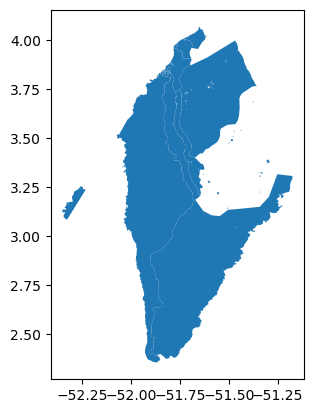

In [28]:
setores.plot()

In [26]:
gdf_points.to_file("gdf_points.shp")

<Axes: >

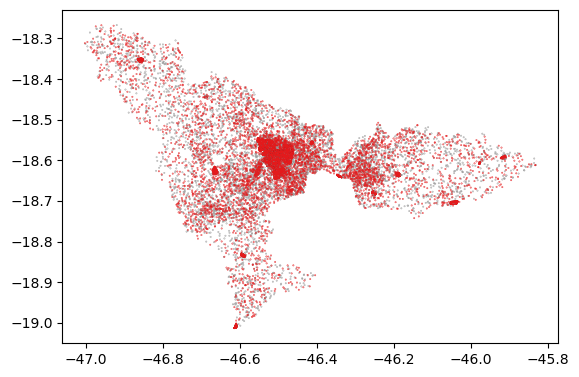

In [108]:
gdf_unificado.plot(markersize=0.1, column='SITUACAO', cmap="Set1")

<Axes: >

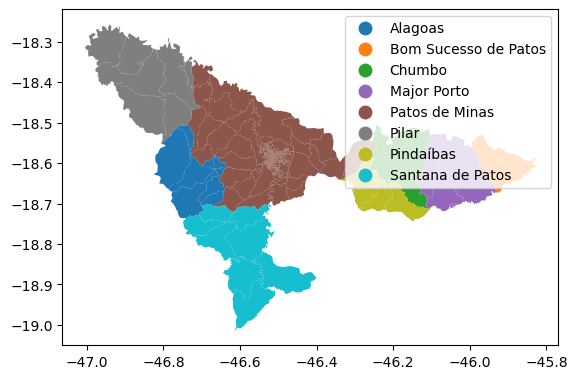

In [58]:
patos.plot( column="NM_DIST", legend=True)

<Axes: >

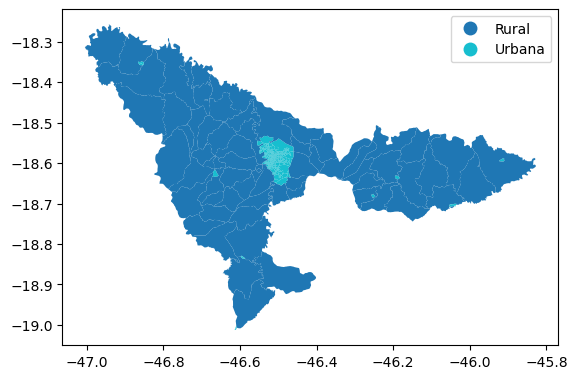

In [59]:
patos.plot( column="SITUACAO", legend=True)